<a href="https://colab.research.google.com/github/MikeSirya/Master-Thesis/blob/main/Random_Forest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
import os
import numpy as np

import  tensorflow.keras.losses
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

temp = pd.read_csv('/content/Castellon Baynat21.csv')
# Make sure your timestamp is a datetime type.





In [ ]:
temp.index = pd.to_datetime(temp['Timestamp'], format= "%d/%m/%Y %H:%M")
temp[:10]

,Timestamp,Castelló de la Plana - IES Vicent Sos Baynat
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,10.6
2021-01-01 00:10:00,01/01/2021 00:10,10.7
2021-01-01 00:20:00,01/01/2021 00:20,10.5
2021-01-01 00:30:00,01/01/2021 00:30,10.4
2021-01-01 00:40:00,01/01/2021 00:40,10.4
2021-01-01 00:50:00,01/01/2021 00:50,10.3
2021-01-01 01:00:00,01/01/2021 01:00,9.8
2021-01-01 01:10:00,01/01/2021 01:10,9.8
2021-01-01 01:20:00,01/01/2021 01:20,10.0


<Axes: xlabel='Timestamp'>

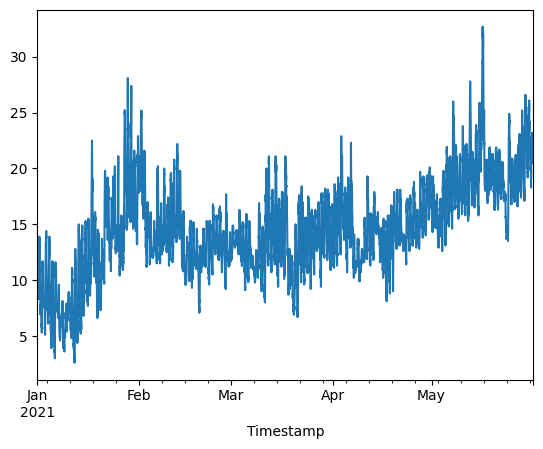

In [ ]:
temp = temp['Castelló de la Plana - IES Vicent Sos Baynat']
temp.plot()

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((21739, 5, 1), (21739,))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have already defined your df_to_X_y function and loaded your data

# Features (X) and Target Variable (y) using df_to_X_y
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)

# Nested Cross-Validation
tscv_outer = TimeSeriesSplit(n_splits=5)
tscv_inner = TimeSeriesSplit(n_splits=3)

param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}

rf_model = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv_inner)

for train_outer, test_outer in tscv_outer.split(X):
    X_train_outer, X_test_outer = X[train_outer], X[test_outer]
    y_train_outer, y_test_outer = y[train_outer], y[test_outer]

    # Flatten the X_train_outer array
    X_train_outer_flat = X_train_outer.reshape(X_train_outer.shape[0], -1)

    grid_search.fit(X_train_outer_flat, y_train_outer)

    best_model = grid_search.best_estimator_

    # Flatten the X_test_outer array for prediction
    X_test_outer_flat = X_test_outer.reshape(X_test_outer.shape[0], -1)

    y_pred_outer = best_model.predict(X_test_outer_flat)

    mse = mean_squared_error(y_test_outer, y_pred_outer)
    print(f'Mean Squared Error for this fold: {mse}')

# You can aggregate and analyze the results as needed


Mean Squared Error for this fold: 0.3928177188374634
Mean Squared Error for this fold: 0.05680314363839583
Mean Squared Error for this fold: 0.068633617879486
Mean Squared Error for this fold: 0.05773947901549106
Mean Squared Error for this fold: 0.6180572882314553


In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# Assuming you have trained your new model (best_model) and obtained predictions for the training set (X_train and y_train)
train_predictions = best_model.predict(X_train_outer_flat).flatten()  # Modify as needed

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_train_outer, train_predictions))

# Create a DataFrame to store results
train_results = pd.DataFrame(data={'Actuals': y_train_outer, 'Train Predictions': train_predictions, 'RMSE': [rmse] * len(y_train_outer)})

# Print the results
print("Training Results:")
print(train_results)


Training Results:
       Actuals  Train Predictions      RMSE
0         10.3          10.385884  0.201877
1          9.8          10.201868  0.201877
2          9.8           9.716974  0.201877
3         10.0           9.784883  0.201877
4         10.0          10.002798  0.201877
...        ...                ...       ...
18111     19.9          20.011409  0.201877
18112     20.1          19.946671  0.201877
18113     19.5          20.011409  0.201877
18114     19.3          19.283479  0.201877
18115     18.9          19.211569  0.201877

[18116 rows x 3 columns]


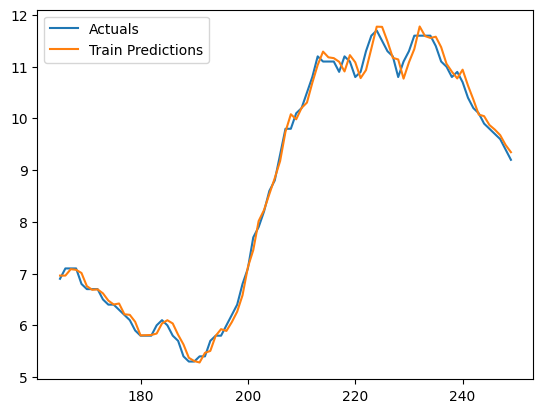

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Actuals'][165:250], label='Actuals')
plt.plot(train_results['Train Predictions'][165:250], label='Train Predictions')
plt.legend()

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/Castellon Bayanat22.csv"

val_df = pd.read_csv(csv_path)
val_df

,Timestamp,Castelló de la Plana - IES Vicent Sos Baynat
0,01/01/2021 00:00,9.7
1,01/01/2021 00:10,9.5
2,01/01/2021 00:20,9.3
3,01/01/2021 00:30,9.3
4,01/01/2021 00:40,9.1
...,...,...
21739,31/05/2021 23:10,21.3
21740,31/05/2021 23:20,21.2
21741,31/05/2021 23:30,21.2
21742,31/05/2021 23:40,21.3


In [ ]:
val_df.index = pd.to_datetime(val_df['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df[:10]

,Timestamp,Castelló de la Plana - IES Vicent Sos Baynat
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,9.7
2021-01-01 00:10:00,01/01/2021 00:10,9.5
2021-01-01 00:20:00,01/01/2021 00:20,9.3
2021-01-01 00:30:00,01/01/2021 00:30,9.3
2021-01-01 00:40:00,01/01/2021 00:40,9.1
2021-01-01 00:50:00,01/01/2021 00:50,8.8
2021-01-01 01:00:00,01/01/2021 01:00,8.4
2021-01-01 01:10:00,01/01/2021 01:10,8.1
2021-01-01 01:20:00,01/01/2021 01:20,8.2


<Axes: xlabel='Timestamp'>

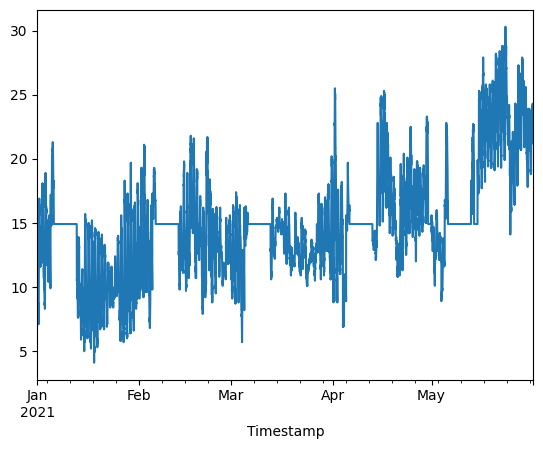

In [ ]:
val_df = val_df['Castelló de la Plana - IES Vicent Sos Baynat']
val_df.plot()

In [ ]:
WINDOW_SIZE = 5
X_test, y_test = df_to_X_y(val_df, WINDOW_SIZE)
X_test.shape, y_test.shape

((21739, 5, 1), (21739,))

In [ ]:
# Convert the new dataset into the format expected by the model
X_test, y_test = df_to_X_y(val_df, WINDOW_SIZE)  # Adjust WINDOW_SIZE if needed

# Flatten the X_test array before making predictions
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Make predictions using the trained model
test_predictions = best_model.predict(X_test_flat).flatten()

# Evaluate the model on the new dataset (optional)
rmse_test = sqrt(mean_squared_error(y_test, test_predictions))
print(f"RMSE on the test dataset: {rmse_test}")

# You can also create a DataFrame to store and print the results if needed
test_results = pd.DataFrame(data={'Actuals': y_test, 'Test Predictions': test_predictions, 'RMSE': [rmse_test] * len(y_test)})
print("Testing Results:")
print(test_results)


RMSE on the test dataset: 0.3727948349508576
Testing Results:
       Actuals  Test Predictions      RMSE
0          8.8          9.018742  0.372795
1          8.4          8.735691  0.372795
2          8.1          8.223033  0.372795
3          8.2          7.980393  0.372795
4          8.3          8.239554  0.372795
...        ...               ...       ...
21734     21.3         21.585929  0.372795
21735     21.2         21.238105  0.372795
21736     21.2         21.045556  0.372795
21737     21.3         21.045678  0.372795
21738     21.2         21.052543  0.372795

[21739 rows x 3 columns]


Text(0.5, 1.0, 'RANDOM FOREST MODEL 2')

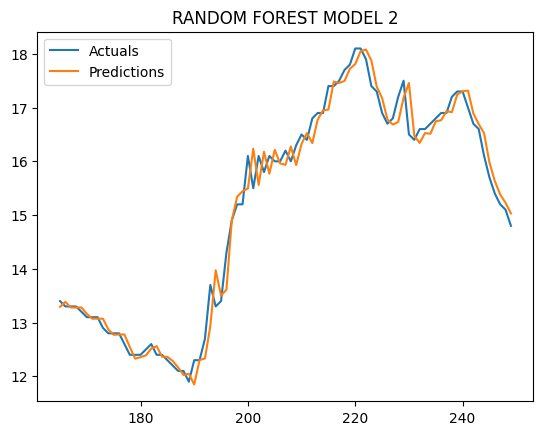

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_results['Actuals'][165:250], label='Actuals')
plt.plot(test_results['Test Predictions'][165:250], label='Predictions')
plt.legend()
plt.title('RANDOM FOREST MODEL 2')

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/Orpesa22.csv"

val_df2 = pd.read_csv(csv_path)
val_df2

,Timestamp,Orpesa Torre Bellver
0,01/01/2022 00:00,8.150000
1,01/01/2022 00:10,7.900000
2,01/01/2022 00:20,7.850000
3,01/01/2022 00:30,7.900000
4,01/01/2022 00:40,7.800000
...,...,...
21739,NaN,12.770466
21740,NaN,12.770466
21741,NaN,12.770466
21742,NaN,12.770466


In [ ]:
val_df2.index = pd.to_datetime(val_df2['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df2[:10]

,Timestamp,Orpesa Torre Bellver
Timestamp,,
2022-01-01 00:00:00,01/01/2022 00:00,8.15
2022-01-01 00:10:00,01/01/2022 00:10,7.90
2022-01-01 00:20:00,01/01/2022 00:20,7.85
2022-01-01 00:30:00,01/01/2022 00:30,7.90
2022-01-01 00:40:00,01/01/2022 00:40,7.80
2022-01-01 00:50:00,01/01/2022 00:50,8.00
2022-01-01 01:00:00,01/01/2022 01:00,8.35
2022-01-01 01:10:00,01/01/2022 01:10,8.50
2022-01-01 01:20:00,01/01/2022 01:20,8.85


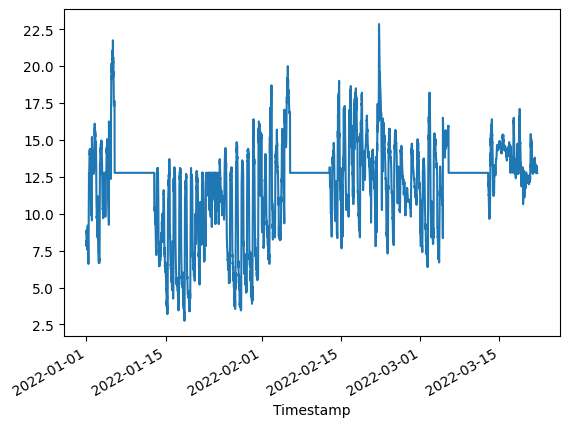

In [ ]:
val_df2 = val_df2['Orpesa Torre Bellver']
val_df2.plot()

In [ ]:
WINDOW_SIZE = 5
X_test2, y_test2 = df_to_X_y(val_df2, WINDOW_SIZE)
X_test2.shape, y_test2.shape

((21739, 5, 1), (21739,))

In [ ]:
from sklearn.impute import SimpleImputer
# Assuming you have already defined best_model, X_test, and y_test
X_test2, y_test2 = df_to_X_y(val_df2, WINDOW_SIZE)

# Flatten the X_test array before making predictions
X_test_flat2 = X_test2.reshape(X_test2.shape[0], -1)

# Check for missing values in X_test_flat
missing_values_X = np.isnan(X_test_flat2)
if np.any(missing_values_X):
    # Impute missing values in X_test_flat using SimpleImputer
    imputer_X = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
    X_test_flat2 = imputer_X.fit_transform(X_test_flat2)

# Check for any remaining NaN values after imputation in X_test_flat
if np.isnan(X_test_flat2).any():
    raise ValueError("Imputation did not handle all missing values in the test data.")

# Make predictions using the trained model
test_predictions2 = best_model.predict(X_test_flat2).flatten()

# Check for missing values in y_test
missing_values_y = np.isnan(y_test2)
if np.any(missing_values_y):
    # Impute missing values in y_test using SimpleImputer
    imputer_y = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
    y_test2 = imputer_y.fit_transform(y_test2.reshape(-1, 1)).flatten()

# Check for any remaining NaN values after imputation in y_test
if np.isnan(y_test2).any():
    raise ValueError("Imputation did not handle all missing values in the test data.")

# Check for NaN values in test_predictions and y_test
nan_mask = np.isnan(y_test2) | np.isnan(test_predictions2)

# Remove rows with NaN values
y_test_cleaned2 = y_test2[~nan_mask]
test_predictions_cleaned2 = test_predictions2[~nan_mask]

# Check again for NaN values after removal
if np.isnan(y_test_cleaned2).any() or np.isnan(test_predictions_cleaned2).any():
    raise ValueError("NaN values still present after removal.")

# Calculate the Root Mean Squared Error (RMSE)
rmse_test2 = sqrt(mean_squared_error(y_test_cleaned2, test_predictions_cleaned2))

# Create a DataFrame with the results
test_results2 = pd.DataFrame(data={'Test Predictions': test_predictions_cleaned2, 'Actuals': y_test_cleaned2, 'RMSE': [rmse_test2] * len(y_test_cleaned2)})

print(test_results2)


       Test Predictions    Actuals      RMSE
0              7.816023   8.000000  0.325973
1              8.047178   8.350000  0.325973
2              8.614670   8.500000  0.325973
3              8.876229   8.850000  0.325973
4              9.139893   8.900000  0.325973
...                 ...        ...       ...
21734         12.778631  12.770466  0.325973
21735         12.778631  12.770466  0.325973
21736         12.778631  12.770466  0.325973
21737         12.778631  12.770466  0.325973
21738         12.778631  12.770466  0.325973

[21739 rows x 3 columns]


Text(0.5, 1.0, 'RANDOM FOREST MODEL 2')

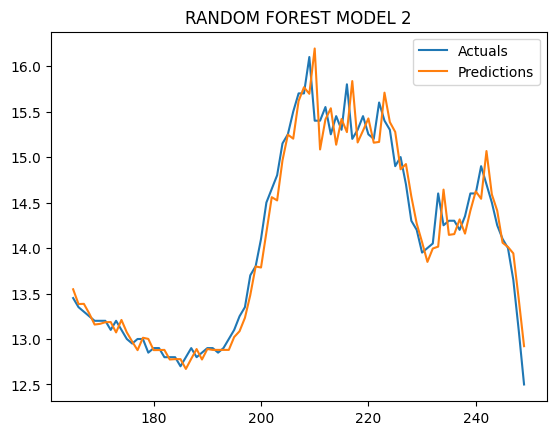

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_results2['Actuals'][165:250], label='Actuals')
plt.plot(test_results2['Test Predictions'][165:250], label='Predictions')
plt.legend()
plt.title('RANDOM FOREST MODEL 2')

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/Xodos22.csv"
val_df4= pd.read_csv(csv_path)
val_df4

,Timestamp,Xodos
0,01/01/2021 00:00,16.4
1,01/01/2021 00:10,16.7
2,01/01/2021 00:20,17.1
3,01/01/2021 00:30,17.2
4,01/01/2021 00:40,17.2
...,...,...
21739,31/05/2021 23:10,17.7
21740,31/05/2021 23:20,17.7
21741,31/05/2021 23:30,18.0
21742,31/05/2021 23:40,17.9


In [ ]:
val_df4.index = pd.to_datetime(val_df4['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df4[:10]

,Timestamp,Xodos
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,16.4
2021-01-01 00:10:00,01/01/2021 00:10,16.7
2021-01-01 00:20:00,01/01/2021 00:20,17.1
2021-01-01 00:30:00,01/01/2021 00:30,17.2
2021-01-01 00:40:00,01/01/2021 00:40,17.2
2021-01-01 00:50:00,01/01/2021 00:50,17.1
2021-01-01 01:00:00,01/01/2021 01:00,16.9
2021-01-01 01:10:00,01/01/2021 01:10,17.2
2021-01-01 01:20:00,01/01/2021 01:20,17.4


<Axes: xlabel='Timestamp'>

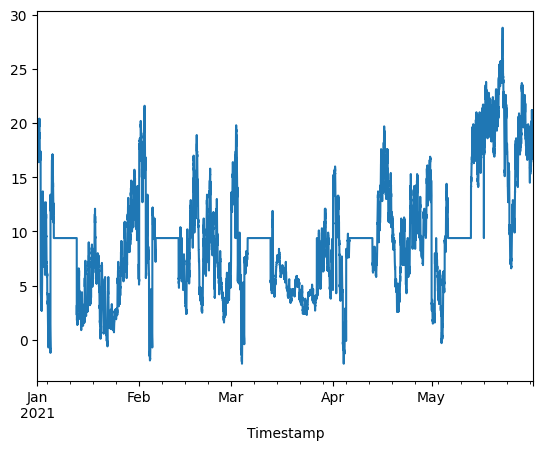

In [ ]:
val_df4 = val_df4['Xodos']
val_df4.plot()

In [ ]:
WINDOW_SIZE = 5
X_test4, y_test4 = df_to_X_y(val_df4, WINDOW_SIZE)
X_test4.shape, y_test4.shape

((21739, 5, 1), (21739,))

In [ ]:
from sklearn.impute import SimpleImputer
# Assuming you have already defined best_model, X_test, and y_test
X_test4, y_test4 = df_to_X_y(val_df4, WINDOW_SIZE)

# Flatten the X_test array before making predictions
X_test_flat4 = X_test4.reshape(X_test4.shape[0], -1)

# Check for missing values in X_test_flat
missing_values_X = np.isnan(X_test_flat4)
if np.any(missing_values_X):
    # Impute missing values in X_test_flat using SimpleImputer
    imputer_X = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
    X_test_flat4 = imputer_X.fit_transform(X_test_flat4)

# Check for any remaining NaN values after imputation in X_test_flat
if np.isnan(X_test_flat4).any():
    raise ValueError("Imputation did not handle all missing values in the test data.")

# Make predictions using the trained model
test_predictions4 = best_model.predict(X_test_flat4).flatten()

# Check for missing values in y_test
missing_values_y = np.isnan(y_test4)
if np.any(missing_values_y):
    # Impute missing values in y_test using SimpleImputer
    imputer_y = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
    y_test4 = imputer_y.fit_transform(y_test4.reshape(-1, 1)).flatten()

# Check for any remaining NaN values after imputation in y_test
if np.isnan(y_test4).any():
    raise ValueError("Imputation did not handle all missing values in the test data.")

# Check for NaN values in test_predictions and y_test
nan_mask = np.isnan(y_test4) | np.isnan(test_predictions4)

# Remove rows with NaN values
y_test_cleaned4 = y_test4[~nan_mask]
test_predictions_cleaned4 = test_predictions4[~nan_mask]

# Check again for NaN values after removal
if np.isnan(y_test_cleaned4).any() or np.isnan(test_predictions_cleaned4).any():
    raise ValueError("NaN values still present after removal.")

# Calculate the Root Mean Squared Error (RMSE)
rmse_test4 = sqrt(mean_squared_error(y_test_cleaned4, test_predictions_cleaned4))

# Create a DataFrame with the results
test_results4 = pd.DataFrame(data={'Test Predictions': test_predictions_cleaned4, 'Actuals': y_test_cleaned4, 'RMSE': [rmse_test4] * len(y_test_cleaned4)})


print(test_results4)


       Test Predictions  Actuals      RMSE
0             17.295736     17.1  0.707384
1             17.048768     16.9  0.707384
2             16.859608     17.2  0.707384
3             17.263824     17.4  0.707384
4             17.437100     17.2  0.707384
...                 ...      ...       ...
21734         17.883629     17.7  0.707384
21735         17.638589     17.7  0.707384
21736         17.643202     18.0  0.707384
21737         17.891705     17.9  0.707384
21738         17.878241     17.7  0.707384

[21739 rows x 3 columns]


Text(0.5, 1.0, 'RANDOM FOREST MODEL 2')

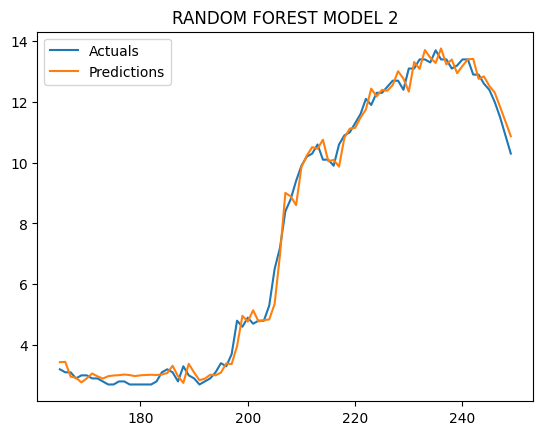

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_results4['Actuals'][165:250], label='Actuals')
plt.plot(test_results4['Test Predictions'][165:250], label='Predictions')
plt.legend()
plt.title('RANDOM FOREST MODEL 2')

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/SantMateu22.csv"

val_df5= pd.read_csv(csv_path)
val_df5

,Timestamp,Sant Mateu
0,01/01/2021 00:00,6.15
1,01/01/2021 00:10,6.70
2,01/01/2021 00:20,6.85
3,01/01/2021 00:30,6.65
4,01/01/2021 00:40,6.55
...,...,...
21739,31/05/2021 23:10,17.75
21740,31/05/2021 23:20,17.80
21741,31/05/2021 23:30,17.70
21742,31/05/2021 23:40,16.45


In [ ]:
val_df5.index = pd.to_datetime(val_df5['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df5[:10]

,Timestamp,Sant Mateu
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,6.15
2021-01-01 00:10:00,01/01/2021 00:10,6.70
2021-01-01 00:20:00,01/01/2021 00:20,6.85
2021-01-01 00:30:00,01/01/2021 00:30,6.65
2021-01-01 00:40:00,01/01/2021 00:40,6.55
2021-01-01 00:50:00,01/01/2021 00:50,6.20
2021-01-01 01:00:00,01/01/2021 01:00,6.35
2021-01-01 01:10:00,01/01/2021 01:10,6.15
2021-01-01 01:20:00,01/01/2021 01:20,6.10


<Axes: xlabel='Timestamp'>

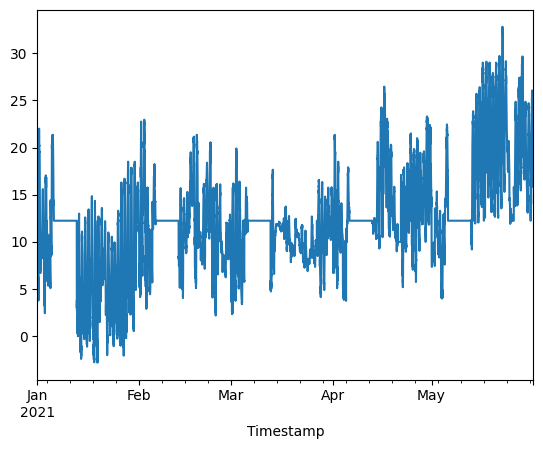

In [ ]:
val_df5 = val_df5['Sant Mateu']
val_df5.plot()

In [ ]:
WINDOW_SIZE = 5
X_test5, y_test5 = df_to_X_y(val_df5, WINDOW_SIZE)
X_test5.shape, y_test5.shape

((21739, 5, 1), (21739,))

In [ ]:
from sklearn.impute import SimpleImputer
# Assuming you have already defined best_model, X_test, and y_test
X_test5, y_test5 = df_to_X_y(val_df5, WINDOW_SIZE)

# Flatten the X_test array before making predictions
X_test_flat5 = X_test5.reshape(X_test5.shape[0], -1)

# Check for missing values in X_test_flat
missing_values_X = np.isnan(X_test_flat5)
if np.any(missing_values_X):
    # Impute missing values in X_test_flat using SimpleImputer
    imputer_X = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
    X_test_flat5 = imputer_X.fit_transform(X_test_flat5)

# Check for any remaining NaN values after imputation in X_test_flat
if np.isnan(X_test_flat5).any():
    raise ValueError("Imputation did not handle all missing values in the test data.")

# Make predictions using the trained model
test_predictions5 = best_model.predict(X_test_flat5).flatten()

# Check for missing values in y_test
missing_values_y = np.isnan(y_test5)
if np.any(missing_values_y):
    # Impute missing values in y_test using SimpleImputer
    imputer_y = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
    y_test5 = imputer_y.fit_transform(y_test5.reshape(-1, 1)).flatten()

# Check for any remaining NaN values after imputation in y_test
if np.isnan(y_test5).any():
    raise ValueError("Imputation did not handle all missing values in the test data.")

# Check for NaN values in test_predictions and y_test
nan_mask = np.isnan(y_test5) | np.isnan(test_predictions5)

# Remove rows with NaN values
y_test_cleaned5 = y_test5[~nan_mask]
test_predictions_cleaned5 = test_predictions5[~nan_mask]

# Check again for NaN values after removal
if np.isnan(y_test_cleaned5).any() or np.isnan(test_predictions_cleaned5).any():
    raise ValueError("NaN values still present after removal.")

# Calculate the Root Mean Squared Error (RMSE)
rmse_test5 = sqrt(mean_squared_error(y_test_cleaned5, test_predictions_cleaned5))

# Create a DataFrame with the results
test_results5 = pd.DataFrame(data={'Test Predictions': test_predictions_cleaned5, 'Actuals': y_test_cleaned5, 'RMSE': [rmse_test5] * len(y_test_cleaned5)})


print(test_results5)


       Test Predictions  Actuals      RMSE
0              6.548290     6.20  0.814906
1              6.024272     6.35  0.814906
2              6.168805     6.15  0.814906
3              6.191191     6.10  0.814906
4              6.072529     6.30  0.814906
...                 ...      ...       ...
21734         18.220089    17.75  0.814906
21735         17.034640    17.80  0.814906
21736         17.778464    17.70  0.814906
21737         17.595842    16.45  0.814906
21738         16.506260    15.85  0.814906

[21739 rows x 3 columns]


Text(0.5, 1.0, 'RANDOM FOREST MODEL 2')

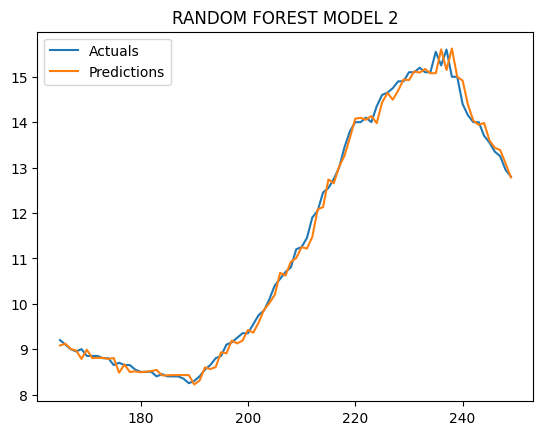

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_results5['Actuals'][165:250], label='Actuals')
plt.plot(test_results5['Test Predictions'][165:250], label='Predictions')
plt.legend()
plt.title('RANDOM FOREST MODEL 2')

In [ ]:
# Specify the path to the CSV file with station codes
csv_path = "/content/Forcall22.csv"

val_df6= pd.read_csv(csv_path)
val_df6

,Timestamp,Forcall
0,01/01/2021 00:00,2.8
1,01/01/2021 00:10,2.3
2,01/01/2021 00:20,2.2
3,01/01/2021 00:30,2.4
4,01/01/2021 00:40,2.5
...,...,...
21739,31/05/2021 23:10,17.6
21740,31/05/2021 23:20,17.3
21741,31/05/2021 23:30,17.1
21742,31/05/2021 23:40,16.9


In [ ]:
val_df6.index = pd.to_datetime(val_df6['Timestamp'], format= "%d/%m/%Y %H:%M")
val_df6[:10]

,Timestamp,Forcall
Timestamp,,
2021-01-01 00:00:00,01/01/2021 00:00,2.8
2021-01-01 00:10:00,01/01/2021 00:10,2.3
2021-01-01 00:20:00,01/01/2021 00:20,2.2
2021-01-01 00:30:00,01/01/2021 00:30,2.4
2021-01-01 00:40:00,01/01/2021 00:40,2.5
2021-01-01 00:50:00,01/01/2021 00:50,2.3
2021-01-01 01:00:00,01/01/2021 01:00,1.9
2021-01-01 01:10:00,01/01/2021 01:10,1.8
2021-01-01 01:20:00,01/01/2021 01:20,1.7


<Axes: xlabel='Timestamp'>

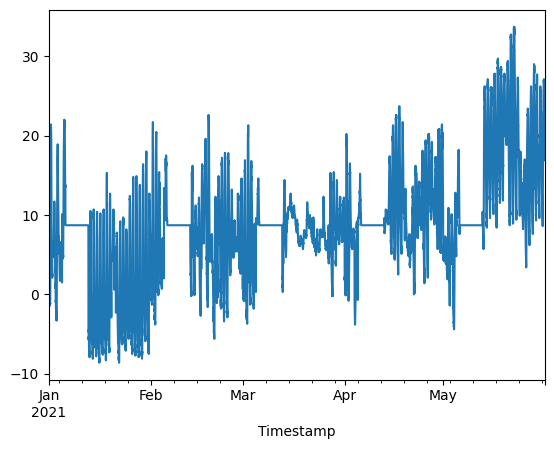

In [ ]:
val_df6 = val_df6["Forcall"]
val_df6.plot()

In [ ]:
WINDOW_SIZE = 5
X_test6, y_test6 = df_to_X_y(val_df6, WINDOW_SIZE)
X_test6.shape, y_test6.shape

((21739, 5, 1), (21739,))

In [ ]:
from sklearn.impute import SimpleImputer
# Assuming you have already defined best_model, X_test, and y_test
X_test6, y_test6 = df_to_X_y(val_df6, WINDOW_SIZE)

# Flatten the X_test array before making predictions
X_test_flat6 = X_test6.reshape(X_test6.shape[0], -1)

# Check for missing values in X_test_flat
missing_values_X = np.isnan(X_test_flat6)
if np.any(missing_values_X):
    # Impute missing values in X_test_flat using SimpleImputer
    imputer_X = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
    X_test_flat6 = imputer_X.fit_transform(X_test_flat6)

# Check for any remaining NaN values after imputation in X_test_flat
if np.isnan(X_test_flat6).any():
    raise ValueError("Imputation did not handle all missing values in the test data.")

# Make predictions using the trained model
test_predictions6 = best_model.predict(X_test_flat6).flatten()

# Check for missing values in y_test
missing_values_y = np.isnan(y_test6)
if np.any(missing_values_y):
    # Impute missing values in y_test using SimpleImputer
    imputer_y = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
    y_test6 = imputer_y.fit_transform(y_test6.reshape(-1, 1)).flatten()

# Check for any remaining NaN values after imputation in y_test
if np.isnan(y_test6).any():
    raise ValueError("Imputation did not handle all missing values in the test data.")

# Check for NaN values in test_predictions and y_test
nan_mask = np.isnan(y_test6) | np.isnan(test_predictions6)

# Remove rows with NaN values
y_test_cleaned6 = y_test6[~nan_mask]
test_predictions_cleaned6 = test_predictions6[~nan_mask]

# Check again for NaN values after removal
if np.isnan(y_test_cleaned6).any() or np.isnan(test_predictions_cleaned6).any():
    raise ValueError("NaN values still present after removal.")

# Calculate the Root Mean Squared Error (RMSE)
rmse_test6 = sqrt(mean_squared_error(y_test_cleaned6, test_predictions_cleaned6))

# Create a DataFrame with the results
test_results6 = pd.DataFrame(data={'Test Predictions': test_predictions_cleaned6, 'Actuals': y_test_cleaned6, 'RMSE': [rmse_test6] * len(y_test_cleaned6)})


print(test_results6)


       Test Predictions  Actuals     RMSE
0              3.075446      2.3  2.45913
1              3.073875      1.9  2.45913
2              3.073875      1.8  2.45913
3              3.073875      1.7  2.45913
4              3.073875      2.0  2.45913
...                 ...      ...      ...
21734         17.534776     17.6  2.45913
21735         17.525922     17.3  2.45913
21736         17.179627     17.1  2.45913
21737         17.037978     16.9  2.45913
21738         16.857004     16.9  2.45913

[21739 rows x 3 columns]


Text(0.5, 1.0, 'RANDOM FOREST MODEL 2')

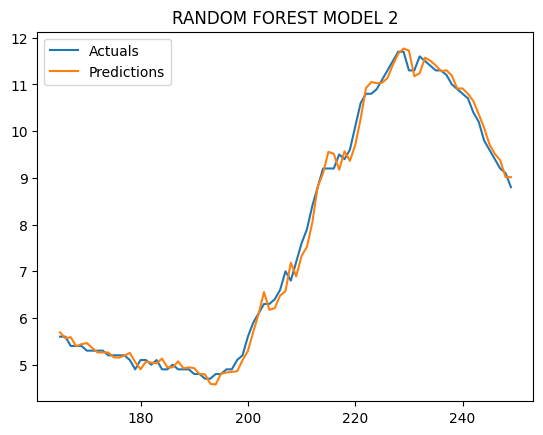

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_results6['Actuals'][165:250], label='Actuals')
plt.plot(test_results6['Test Predictions'][165:250], label='Predictions')
plt.legend()
plt.title('RANDOM FOREST MODEL 2')